## **Assignment - Week 6**
**Instructions:** 
- Answer each question on a separate cell, inidcating the question first in a markdown cell before giving the answer either in a markdown or code cell depending on the question.
- Use comments in your code
- Give titles to all your charts and give x and y labels where necessary
- Use the ggplot style for your charts

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('retail_transaction.csv')

You are provided with a retail transaction dataset contaning customer transaction data.

You are expected to use the dataset to answer the following questions:
1. Get the number of records and variables contained in the dataset and convert all columns to lower case.
2. Is there any null value or duplicate record present?
3. What is the new dataframe shape after dropping null and duplicate if present?
4. Create a new dataframe containing just the numerical variables and access the relationship between the variables.
5. You have a transaction date variable, convert it to a datetime variable and extract the month names and day names into two new columns
6. Check for any outlier in the price column and remove any value that is greater than 300.
7. Plot a scatter plot graph to access tha relationship between price and discount, give the graph a title and make the color green
8. For the new months column you created, plot a line chart showing the total quantity for each month. Use a figure size of 8x5.
9. Also for the days column you created, plot a bar chart showing the average price for each day
10. Which of the product category has the highest quantity sold? represent it in a pie chart. Use a figure size of 7x7

## 1. Get the number of records and variables contained in the dataset and convert all columns to lower case.

In [6]:
df

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,ProductCategory,DiscountApplied(%)
0,169,B,7.0,76.15,1/31/2024 10:50,Cash,Clothing,14.2
1,213,C,4.0,85.59,6/26/2023 21:13,Credit Card,Home Decor,0.5
2,315,C,4.0,94.33,8/18/2023 07:01,Cash,Electronics,20.0
3,442,B,6.0,81.00,8/30/2023 03:37,Debit Card,Home Decor,16.0
4,587,B,1.0,45.68,9/14/2023 23:34,Credit Card,Home Decor,10.3
...,...,...,...,...,...,...,...,...
1162,298695,B,1.0,103.24,6/12/2023 15:01,PayPal,Electronics,7.9
1163,298721,A,8.0,43.87,7/21/2023 01:17,PayPal,Books,1.3
1164,298832,B,6.0,57.36,6/22/2023 23:33,Debit Card,Books,17.1
1165,298848,D,7.0,82.33,6/25/2023 01:30,Credit Card,Home Decor,0.8


In [7]:
# Getting number of records which is equivalent to row
rec_num = df.shape[0]

# Getting the number of variables which is equivalent to the features + the Target

var_num = df.shape[1]

# printing both the number of variables and the number of records in the terminal

print(f'The number of Records is: {rec_num}')
print(f'The number of variables is: {var_num}')

#converting the dataset columns into lower case
df.columns = df.columns.str.lower()

# Displaying the columns 
df.columns

The number of Records is: 1167
The number of variables is: 8


Index(['customerid', 'productid', 'quantity', 'price', 'transactiondate',
       'paymentmethod', 'productcategory', 'discountapplied(%)'],
      dtype='object')

## 2. Is there any null value or duplicate record present?

In [9]:
is_null = df.isnull().sum()
total_nulls = is_null.sum()

if total_nulls > 0:
    print(f"There are a total of {total_nulls} null values in the dataset.")
    print("Number of null values per column:")
    print(is_null[is_null > 0])  # Printing only columns with nulls


There are a total of 32 null values in the dataset.
Number of null values per column:
productid              4
quantity               2
price                 12
paymentmethod          5
productcategory        4
discountapplied(%)     5
dtype: int64


In [10]:
# Checking for duplicate records
duplicate_records = df.duplicated()

# Counting the number of duplicate records
num_duplicate_records = duplicate_records.sum()

print("\n--- Duplicate Record Analysis ---")
if num_duplicate_records > 0:
    print(f"Yes, there are {num_duplicate_records} duplicate records present in the dataset.")
    
    print("\nDuplicate records:")
    print(df[duplicate_records])



--- Duplicate Record Analysis ---
Yes, there are 2 duplicate records present in the dataset.

Duplicate records:
      customerid productid  quantity  price  transactiondate paymentmethod  \
891       236873         C       1.0  28.84  9/26/2023 11:32    Debit Card   
1128      293569         B       3.0  76.86  8/18/2023 17:00          Cash   

     productcategory  discountapplied(%)  
891       Home Decor                 NaN  
1128        Clothing                 NaN  


## 3. What is the new dataframe shape after dropping null and duplicate if present?

In [12]:
# Dropping duplicate rows
df_no_duplicates = df.drop_duplicates()

# Dropping rows with any null values
df_cleaned = df_no_duplicates.dropna()

# Getting the new shape of the DataFrame
new_shape = df_cleaned.shape

print(f"Original shape of the DataFrame: {df.shape}")
print(f"Shape after dropping duplicates: {df_no_duplicates.shape}")
print(f"Shape after dropping rows with null values: {new_shape}")

Original shape of the DataFrame: (1167, 8)
Shape after dropping duplicates: (1165, 8)
Shape after dropping rows with null values: (1136, 8)


## 4. Create a new dataframe containing just the numerical variables and access the relationship between the variables.

In [14]:
#Creating a new DataFrame with numerical variables
numerical_df = df_cleaned.select_dtypes(include=['number'])

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 0 to 1166
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerid          1136 non-null   int64  
 1   quantity            1136 non-null   float64
 2   price               1136 non-null   float64
 3   discountapplied(%)  1136 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 44.4 KB


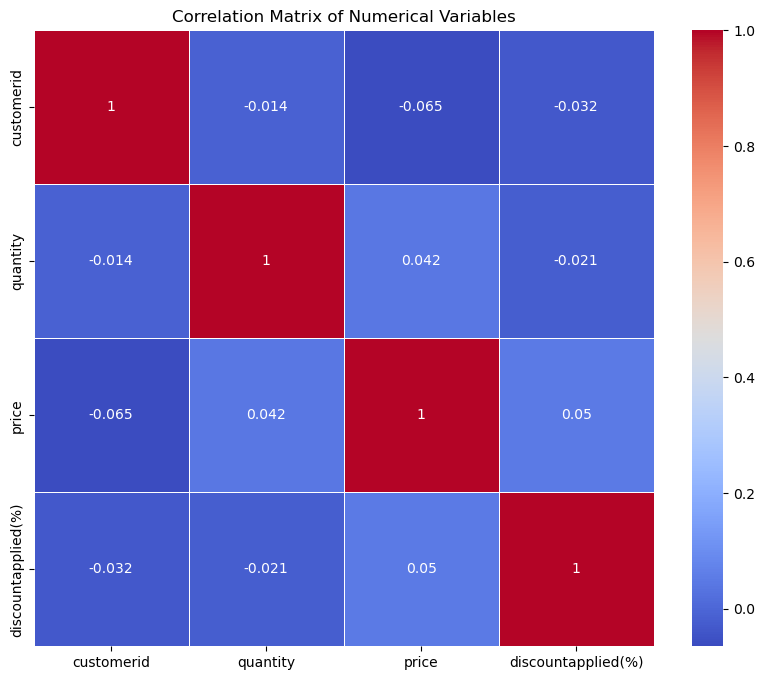

In [15]:
# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualizng the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [16]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoiding redundancy (A vs B is same as B vs A)
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]

        if correlation > 0:
            print(f"There is a positive relationship between '{col1}' and '{col2}'. Correlation: {correlation:.2f}")
        elif correlation < 0:
            print(f"There is an inverse relationship between '{col1}' and '{col2}'. Correlation: {correlation:.2f}")
        else:
            print(f"There is no linear relationship between '{col1}' and '{col2}'. Correlation: {correlation:.2f}")

There is an inverse relationship between 'customerid' and 'quantity'. Correlation: -0.01
There is an inverse relationship between 'customerid' and 'price'. Correlation: -0.06
There is an inverse relationship between 'customerid' and 'discountapplied(%)'. Correlation: -0.03
There is a positive relationship between 'quantity' and 'price'. Correlation: 0.04
There is an inverse relationship between 'quantity' and 'discountapplied(%)'. Correlation: -0.02
There is a positive relationship between 'price' and 'discountapplied(%)'. Correlation: 0.05


## 5. You have a transaction date variable, convert it to a datetime variable and extract the month names and day names into two new columns

In [18]:
df['transactiondate'] = pd.to_datetime(df['transactiondate'], errors='coerce')

# Extracting month names and day names into new columns
df['transaction_month_name'] = df['transactiondate'].dt.month_name()
df['transaction_day_name'] = df['transactiondate'].dt.day_name()

print(df[['transactiondate', 'transaction_month_name', 'transaction_day_name']].head()) # Showing the first few rows with the new columns

      transactiondate transaction_month_name transaction_day_name
0 2024-01-31 10:50:00                January            Wednesday
1 2023-06-26 21:13:00                   June               Monday
2 2023-08-18 07:01:00                 August               Friday
3 2023-08-30 03:37:00                 August            Wednesday
4 2023-09-14 23:34:00              September             Thursday


## 6. Check for any outlier in the price column and remove any value that is greater than 300.

In [20]:
# Check for outliers using 300 as threshold
outliers = df[df['price'] > 300]

print("Outliers (values greater than 300) in the 'price' column:")

# Removing outliers (values greater than 300)
df_no_outliers = df[df['price'] <= 300].copy()

print("\nDataFrame shape before outlier removal:", df.shape)
print("DataFrame shape after outlier removal (price <= 300):", df_no_outliers.shape)


Outliers (values greater than 300) in the 'price' column:

DataFrame shape before outlier removal: (1167, 10)
DataFrame shape after outlier removal (price <= 300): (1152, 10)


## 7. Plot a scatter plot graph to access tha relationship between price and discount, give the graph a title and make the color green

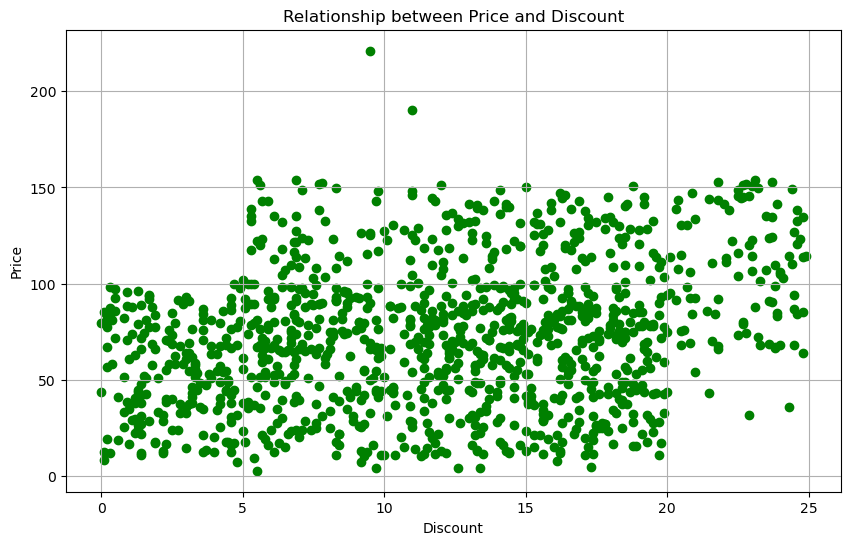

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['discountapplied(%)'], df_no_outliers['price'], color='green')
plt.title('Relationship between Price and Discount')
plt.xlabel('Discount')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## 8. For the new months column you created, plot a line chart showing the total quantity for each month. Use a figure size of 8x5.

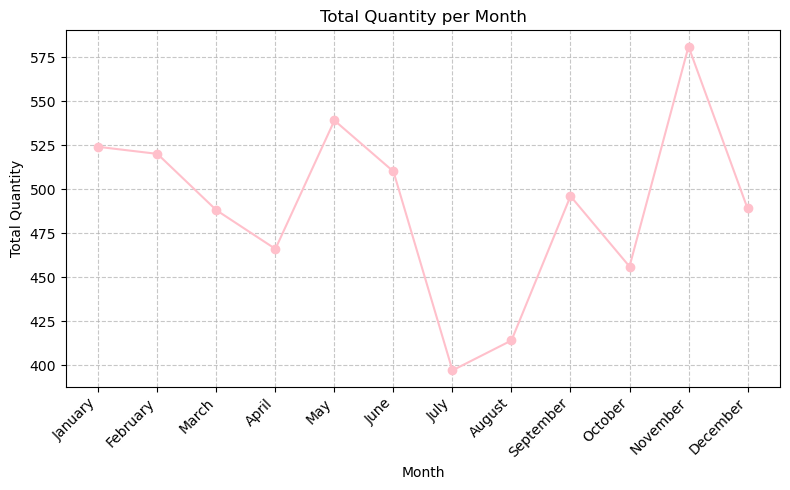

In [24]:
# Grouping by month and sum the quantity
monthly_quantity = df.groupby('transaction_month_name')['quantity'].sum()

# Ordering the months chronologically 
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_quantity = monthly_quantity.reindex(month_order)

# Creating the line chart
plt.figure(figsize=(8, 5))
plt.plot(monthly_quantity.index, monthly_quantity.values, marker='o', linestyle='-', color='pink')
plt.title('Total Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotating month names for better readability
plt.tight_layout()
plt.show()

## 9. Also for the days column you created, plot a bar chart showing the average price for each day

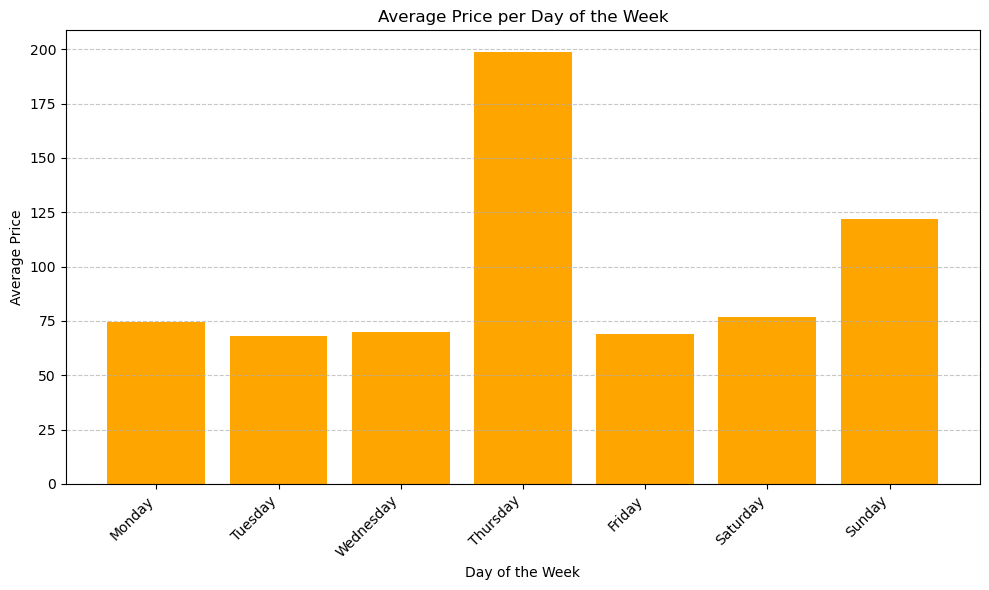

In [26]:
# Calculating the average price for each day
average_price_per_day = df.groupby('transaction_day_name')['price'].mean()

# Ordering the days of the week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_price_per_day = average_price_per_day.reindex(day_order)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_day.index, average_price_per_day.values, color='orange')
plt.title('Average Price per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotating day names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for y-axis only
plt.tight_layout()
plt.show()

## 10. Which of the product category has the highest quantity sold? represent it in a pie chart. Use a figure size of 7x7

The product category with the highest total quantity sold is: 'Electronics' with a total quantity of 2068.0.


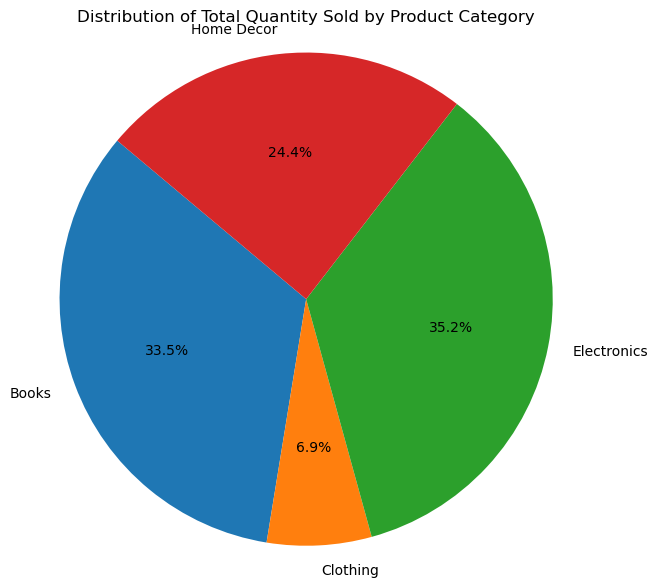

In [28]:
# Grouping by product category and sum the quantity
category_quantity = df.groupby('productcategory')['quantity'].sum()

# Finding the product category with the highest quantity sold
highest_quantity_category = category_quantity.idxmax()
highest_quantity = category_quantity.max()

# Creating the pie chart
plt.figure(figsize=(7, 7))
plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Quantity Sold by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

print(f"The product category with the highest total quantity sold is: '{highest_quantity_category}' with a total quantity of {highest_quantity}.")
plt.show()